# Data structure, training and testing:

Train.npy contains training data.

Test.npy contains testing data for 3 specific configuration

used in Fig.3 of main text. Each set contains 201 data points.

### Data structure:

First 16 coloumn in +1,-1 showing the magnetic configuration.

17th column in energy (between 0 and 200).

18th column is transmission.

19 and 20 column is Sx and Sy for 6th magnetic site.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

train_data=np.load("Train.npy")
test_data=np.load("Test.npy")


def data_analysis(ncol,train,test,dy):

    x_train=train[:,0:17]; y_train=train[:,ncol]
    x_test = test[:,0:17]; y_test = test[:,ncol]

    
    y_train[y_train > 2.0]= 2.0
    y_train[y_train <-2.0]=-2.0

    y_test[y_test > 2.0]= 2.0
    y_test[y_test <-2.0]=-2.0

    #Convert values into class
    y_train_cl=np.rint(y_train/dy)
    y_test_cl =np.rint(y_test/dy)

    #classification with random forest
    clf = RandomForestClassifier(n_jobs=None)
    clf.fit(x_train,y_train_cl)
    y_pred_rf = clf.predict(x_test)
    acq = clf.score(x_test,y_test_cl)

    ydat=np.stack((x_test[:,-1], y_test, y_pred_rf*dy),axis=-1)

    np.save("col%s.npy"%ncol,ydat)


    #Testing with 10% of training data
    x_data=x_train
    y_data=y_train_cl
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=0.1, shuffle=True, random_state=1)
    clf.fit(x_train,y_train)
    y_pred_rf = clf.predict(x_test)   
    acq1 = clf.score(x_test,y_test)


    print("Col= %3i: Test.npy score = %4.2f , Split score = %4.2f"%(ncol, acq,acq1))
    


delta=0.1 #Discretisation parameter. See Fig.5

data_analysis(17,train_data,test_data,delta)
data_analysis(18,train_data,test_data,delta)
data_analysis(19,train_data,test_data,delta)


Col=  17: Test.npy score = 0.86 , Split score = 0.85
Col=  18: Test.npy score = 0.79 , Split score = 0.81
Col=  19: Test.npy score = 0.77 , Split score = 0.81


## Plot the Prediction


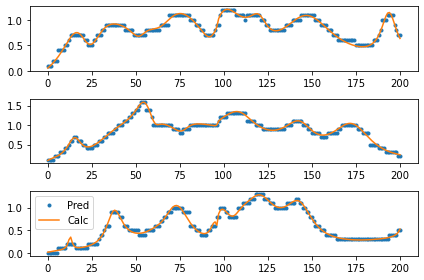

In [2]:

ndat=201 #data per set in Test.npy
data=np.load("col17.npy")

for n in [1,2,3]:
    plt.subplot(3,1,n)
    plt.plot(data[(n-1)*ndat:n*ndat,0],data[(n-1)*ndat:n*ndat,2],".",label="Pred") #predicted value
    plt.plot(data[(n-1)*ndat:n*ndat,0],data[(n-1)*ndat:n*ndat,1],"-",label="Calc") #calculated value
plt.legend()
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()
